In [24]:
import glob
import plt

quic_files_100k = glob.glob("quicly-100k/*")
quic_files_m = glob.glob("quicly-1M/*")

tcp_files_100k = glob.glob("tcp-100k/*")
tcp_files_m = glob.glob("tcp-1M/*")

vpn_files_100k = glob.glob("vpn-100k/*")
vpn_files_m = glob.glob("vpn-1M/*")

tcp_files13_100k = glob.glob("tcp-100k-tls1.3/*")
tcp_files13_m = glob.glob("tcp-1M-tls1.3/*")

vpn_files13_100k = glob.glob("vpn-100k-tls1.3/*")
vpn_files13_m = glob.glob("vpn-1M-tls1.3/*")

tcp_fake_100k = glob.glob("emulated*/wget-100k/*")
tcp_fake_m = glob.glob("emulated*/wget-1M/*")

quic_fake_100k = glob.glob("emulated*/quicly-100k/*")
quic_fake_m = glob.glob("emulated*/quicly-1M/*")


In [25]:
import plt

def get_tcp_time(file):
    tr = plt.trace(file)
    tr.start()
    first = True
    for pkt in tr:
        if pkt.tcp:
            if first:
                first_time = pkt.seconds
                first = False
            cur_time = pkt.seconds
            
    return (cur_time - first_time)

tcp_100k_times = []
tcp_100k13_times = []
tcp_m13_times = []
vpn_100k13_times = []
vpn_m13_times = []

tcp_m_times = []
tcp_fake_100k_times = []
tcp_fake_m_times = []
vpn_100k_times = []
vpn_m_times = []



for file in tcp_files_100k:
    tcp_100k_times.append(get_tcp_time(file))

for file in tcp_files13_100k:
    tcp_100k13_times.append(get_tcp_time(file))

for file in tcp_files13_m:
    tcp_m13_times.append(get_tcp_time(file))

for file in vpn_files13_100k:
    vpn_100k13_times.append(get_tcp_time(file))

for file in vpn_files13_m:
    vpn_m13_times.append(get_tcp_time(file))
    
for file in tcp_files_m:
    tcp_m_times.append(get_tcp_time(file))
    
for file in tcp_fake_100k:
    tcp_fake_100k_times.append(get_tcp_time(file))

for file in tcp_fake_m:
    tcp_fake_m_times.append(get_tcp_time(file))

for file in vpn_files_m:
    vpn_m_times.append(get_tcp_time(file)) 
    
for file in vpn_files_100k:
    vpn_100k_times.append(get_tcp_time(file))
    


In [26]:
import json
def get_quic_time(file):
    with open(file) as w:
        first = True
        for line in w:
            line = json.loads(line)
            if first:
                first_time = line["time"]
                first= False
            if line["conn"] == 0:
                cur_time = line["time"]
    return (cur_time - first_time)/1000

quic_m_times = []
quic_100k_times = []

quic_fake_100k_times = []
quic_fake_m_times = []

for file in quic_files_100k:
    quic_100k_times.append(get_quic_time(file))

for file in quic_files_m:
    quic_m_times.append(get_quic_time(file))
    


In [27]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as mplt
from matplotlib.pyplot import figure
from matplotlib.dates import DateFormatter
from collections import defaultdict
import numpy as np
import datetime
from pylab import *
import matplotlib

def mjrFormatter(x, pos):
    s, ms = divmod(x, 1000)
    return "{:01d}.{:01d}".format(int(s),int(ms))

matplotlib.rcParams.update({'font.size': 15})


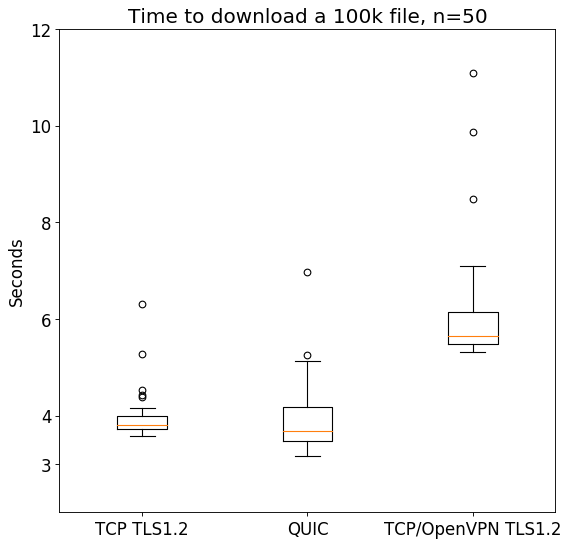

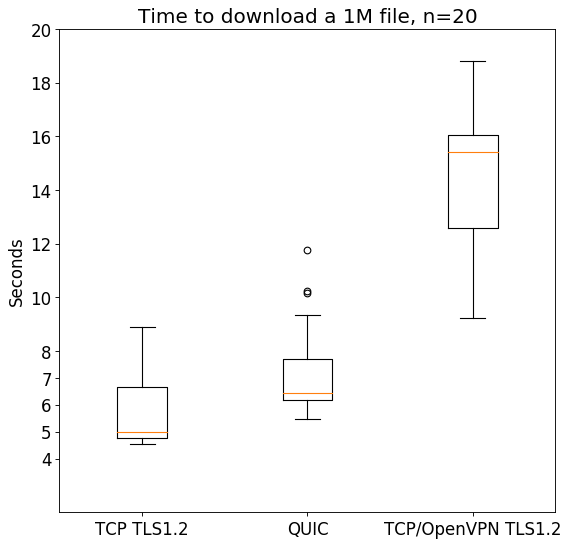

In [28]:

data_to_plot = []
data_to_plot.append(tcp_100k_times)
data_to_plot.append(quic_100k_times)
data_to_plot.append(vpn_100k_times)

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
mplt.title("Time to download a 100k file, n=50")
mplt.ylabel("Seconds")

mplt.yticks([3, 4, 6, 8, 10, 12])
mplt.ylim([2, 12])

mplt.boxplot(data_to_plot)
mplt.xticks([1,2,3], ["TCP TLS1.2","QUIC","TCP/OpenVPN TLS1.2"])

mplt.xticks(rotation=0)
mplt.show()


data_to_plot = []
data_to_plot.append(tcp_m_times)
data_to_plot.append(quic_m_times)
data_to_plot.append(vpn_m_times)

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
mplt.title("Time to download a 1M file, n=20")
mplt.ylabel("Seconds")
mplt.yticks([ 4, 5, 6, 7, 8, 10, 12, 14, 16,18, 20])
mplt.ylim([2, 20])


mplt.boxplot(data_to_plot)
mplt.xticks([1,2,3], ["TCP TLS1.2","QUIC","TCP/OpenVPN TLS1.2"])

mplt.xticks(rotation=0)
mplt.show()


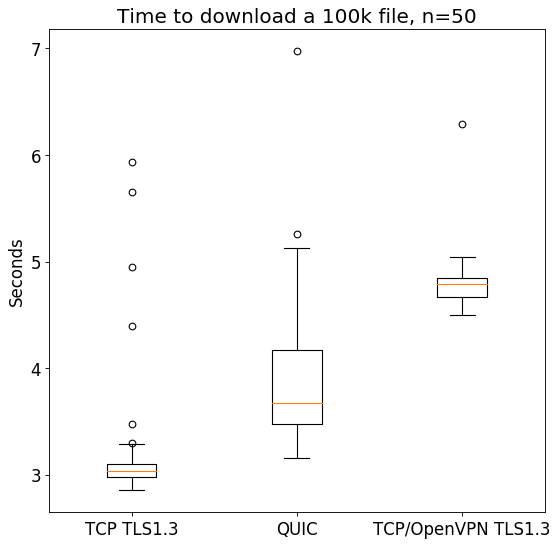

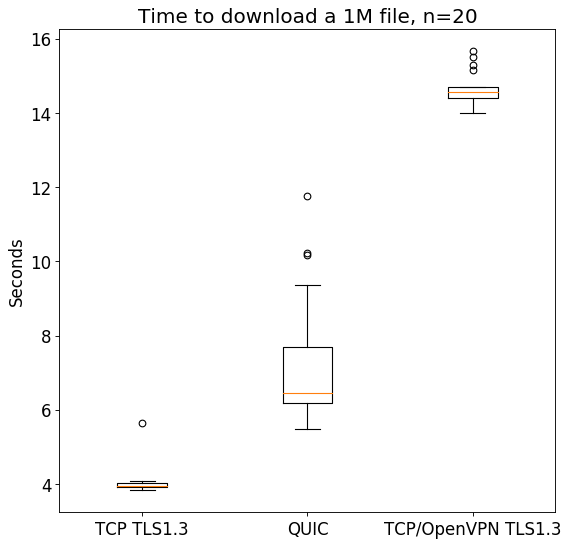

In [29]:

data_to_plot = []
data_to_plot.append(tcp_100k13_times)
data_to_plot.append(quic_100k_times)
data_to_plot.append(vpn_100k13_times)

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
mplt.title("Time to download a 100k file, n=50")
mplt.ylabel("Seconds")

mplt.boxplot(data_to_plot)
mplt.xticks([1,2,3], ["TCP TLS1.3","QUIC","TCP/OpenVPN TLS1.3"])

mplt.xticks(rotation=0)
mplt.show()

data_to_plot = []
data_to_plot.append(tcp_m13_times)
data_to_plot.append(quic_m_times)
data_to_plot.append(vpn_m13_times)

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
mplt.title("Time to download a 1M file, n=20")
mplt.ylabel("Seconds")

mplt.boxplot(data_to_plot)
mplt.xticks([1,2,3], ["TCP TLS1.3","QUIC","TCP/OpenVPN TLS1.3"])

mplt.xticks(rotation=0)
mplt.show()


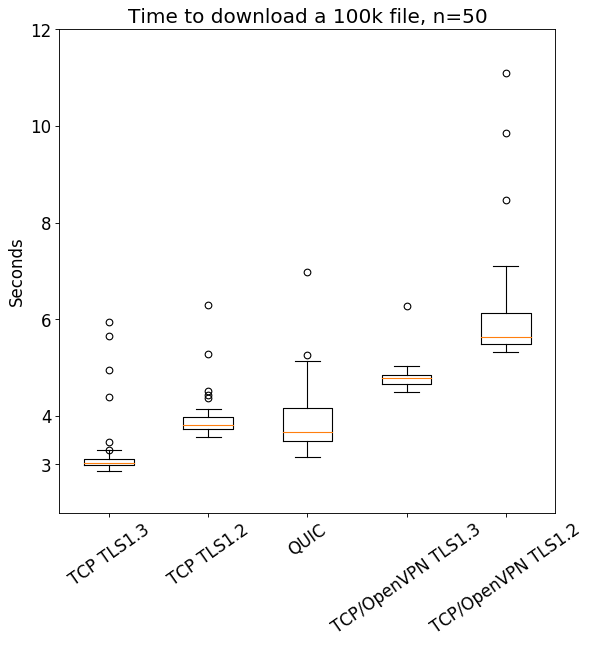

In [30]:

data_to_plot = []
data_to_plot.append(tcp_100k13_times)
data_to_plot.append(tcp_100k_times)
data_to_plot.append(quic_100k_times)
data_to_plot.append(vpn_100k13_times)
data_to_plot.append(vpn_100k_times)
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
mplt.title("Time to download a 100k file, n=50")
mplt.ylabel("Seconds")
mplt.yticks([3,  4, 6, 8, 10, 12])
mplt.ylim([2, 12])

mplt.boxplot(data_to_plot)
mplt.xticks([1,2,3,4,5], [ "TCP TLS1.3", "TCP TLS1.2","QUIC","TCP/OpenVPN TLS1.3", "TCP/OpenVPN TLS1.2"])

mplt.xticks(rotation=35)
mplt.show()


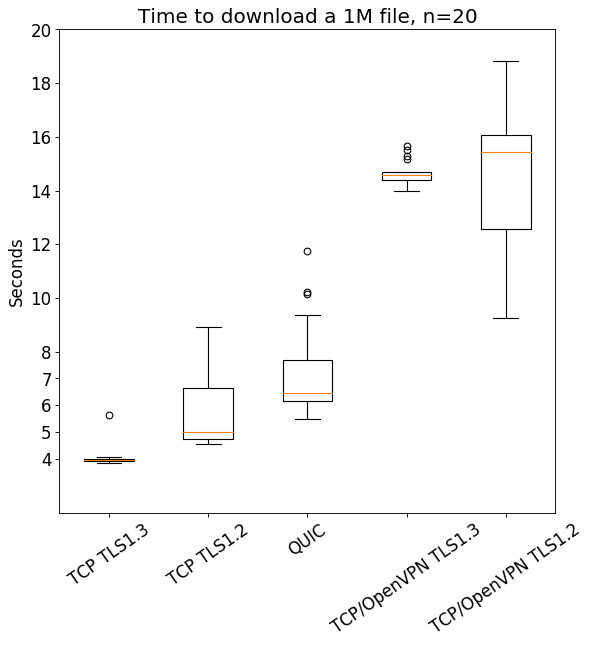

In [31]:

data_to_plot = []
data_to_plot.append(tcp_m13_times)
data_to_plot.append(tcp_m_times)
data_to_plot.append(quic_m_times)
data_to_plot.append(vpn_m13_times)
data_to_plot.append(vpn_m_times)

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
mplt.title("Time to download a 1M file, n=20")
mplt.ylabel("Seconds")
mplt.xticks(rotation=35)

mplt.yticks([ 4, 5, 6, 7, 8, 10, 12, 14, 16,18, 20])

mplt.ylim([2, 20])

mplt.boxplot(data_to_plot)
mplt.xticks([1,2,3,4,5], ["TCP TLS1.3", "TCP TLS1.2","QUIC", "TCP/OpenVPN TLS1.3",  "TCP/OpenVPN TLS1.2"])

mplt.show()


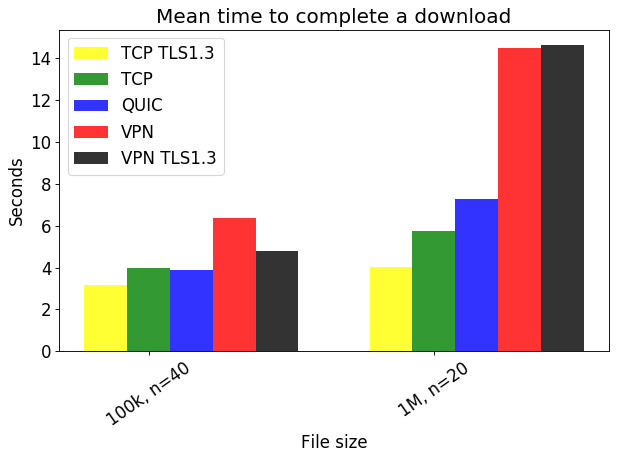

In [32]:
# data to plot
n_groups = 2
means_tcp13 = (np.mean(tcp_100k13_times), np.mean(tcp_m13_times))
means_tcp = (np.mean(tcp_100k_times), np.mean(tcp_m_times))
means_quic = (np.mean(quic_100k_times), np.mean(quic_m_times) )
means_vpn = (np.mean(vpn_100k_times), np.mean(vpn_m_times))
means_vpn13 = (np.mean(vpn_100k13_times), np.mean(vpn_m13_times))
# create plot
#fig, ax = mplt.subplots()
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = mplt.bar(index, means_tcp13, bar_width,
alpha=opacity,
color='yellow',
label='TCP TLS1.3')

rects2 = mplt.bar(index + bar_width, means_tcp, bar_width,
alpha=opacity,
color='g',
label='TCP')

rects3 = mplt.bar(index + 2* bar_width, means_quic, bar_width,
alpha=opacity,
color='b',
label='QUIC')

rects4 = mplt.bar(index + 3 *bar_width, means_vpn, bar_width,
alpha=opacity,
color='r',
label='VPN')

rects5 = mplt.bar(index + 4* bar_width, means_vpn13, bar_width,
alpha=opacity,
color='black',
label='VPN TLS1.3')


mplt.xlabel('File size')
mplt.title('Mean time to complete a download')
mplt.ylabel('Seconds')
mplt.xticks(index + bar_width, ('100k, n=40', '1M, n=20'))
mplt.xticks(rotation=35)

mplt.legend()

mplt.tight_layout()
mplt.show()
